<a href="https://colab.research.google.com/github/maalvarezcabanes/algoritmos_optimizacion/blob/main/Algoritmos_Miguel_Angel_Alvarez_Cabanes_AG1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Guiada 1
## Autor
Miguel Ángel Álvarez Cabanes
## Github
https://github.com/maalvarezcabanes/algoritmos_optimizacion

## Importación paquetes y funciones auxiliares

In [157]:
import math
import random
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [158]:
def clean_plot(ax, xlabel, ylabel, title, legend = True, rotate = 45):
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if legend:
        ax.legend(bbox_to_anchor=(1.2, 1))
    if rotate:
        ax.tick_params(axis='x', labelrotation = rotate)

## Torres de Hanoi
### Implementación del algoritmo
Para la implementación del algoritmo me he basado en la solución presentada durante la sesión de actividades, pero he incorporado algunas modificaciones:
1. Aunque no es necesario, llamo también a la misma función "torres_hanoi" para el movimiento del bloque más grande de cada iteración. Computacionalmente requiere de una llamada de función adicional, pero el código es más homogeneo en mi opinión.
2. No escribo en pantalla los movimientos de forma directa sino que los almaceno en una lista y uso una función de impresión separada porque después quiero usar la función para una visualización de complejidades para la que no voy a necesitar imprimir los movimientos

In [159]:
def imprimir_lista_de_movimientos(lista_de_movimientos):
    for i in lista_de_movimientos:
        print(f"Mover bloque de {i[0]} a {i[1]}")
        
def torres_hanoi(N, origen, destino, pivote, lista_de_movimientos):
    if N == 1:
        lista_de_movimientos.append((origen, destino))
        return lista_de_movimientos
    
    lista_de_movimientos = torres_hanoi(N-1, origen, pivote, destino, lista_de_movimientos)
    lista_de_movimientos = torres_hanoi(1, origen, destino, pivote, lista_de_movimientos)
    lista_de_movimientos = torres_hanoi(N-1, pivote, destino, origen, lista_de_movimientos)
    return lista_de_movimientos

In [160]:
lista_de_movimientos = []
lista_de_movimientos = torres_hanoi(4, 1, 2, 3, lista_de_movimientos)
imprimir_lista_de_movimientos(lista_de_movimientos)

Mover bloque de 1 a 3
Mover bloque de 1 a 2
Mover bloque de 3 a 2
Mover bloque de 1 a 3
Mover bloque de 2 a 1
Mover bloque de 2 a 3
Mover bloque de 1 a 3
Mover bloque de 1 a 2
Mover bloque de 3 a 2
Mover bloque de 3 a 1
Mover bloque de 2 a 1
Mover bloque de 3 a 2
Mover bloque de 1 a 3
Mover bloque de 1 a 2
Mover bloque de 3 a 2


### Complejidad
Para un análisis gráfico de la complejidad del algoritmo, voy a ejecutar el algoritmo para una serie de valores de números de bloques y representar una gráfica comparando con complejidades de O(n), O(n^2), O(2^n) y O(n!)

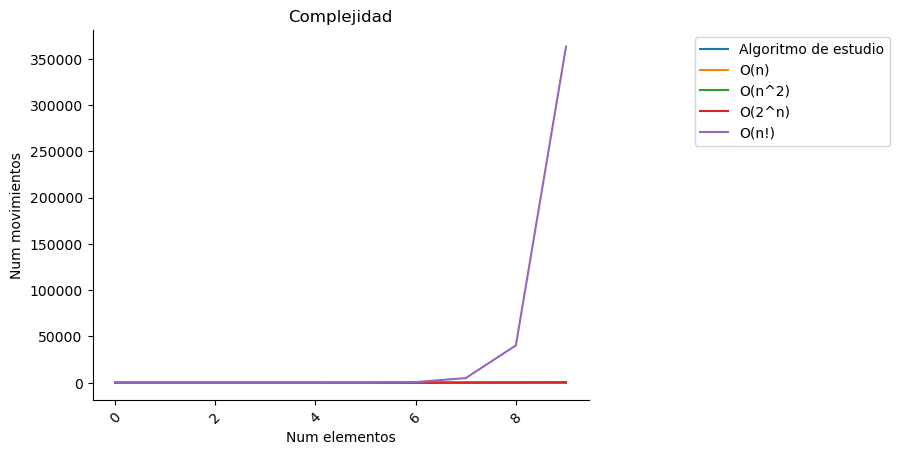

In [161]:
max_num = 10
num_movements = []
num_movements_n = [i for i in range(max_num)]
num_movements_n2 = [i**2 for i in range(max_num)]
num_movements_2n = [2**i for i in range(max_num)]
num_movements_nfact = [math.factorial(i) for i in range(max_num)]

for i in range(max_num):
    lista_de_movimientos = []
    if i == 0:
        num_movements.append(0)
    else:
        num_movements.append(len(torres_hanoi(i, 1, 2, 3, lista_de_movimientos)))
                         
fig, ax = plt.subplots(1, 1)
ax.plot(num_movements, label="Algoritmo de estudio")
ax.plot(num_movements_n, label="O(n)")
ax.plot(num_movements_n2, label="O(n^2)")
ax.plot(num_movements_2n, label="O(2^n)")
ax.plot(num_movements_nfact, label="O(n!)")
clean_plot(ax, "Num elementos", "Num movimientos", "Complejidad")
plt.show();

Se puede observar que ya para n=10 la complejidad de O(n!) es tan dominante que no deja observar la comparación de la complejidad del algoritmo en estudio

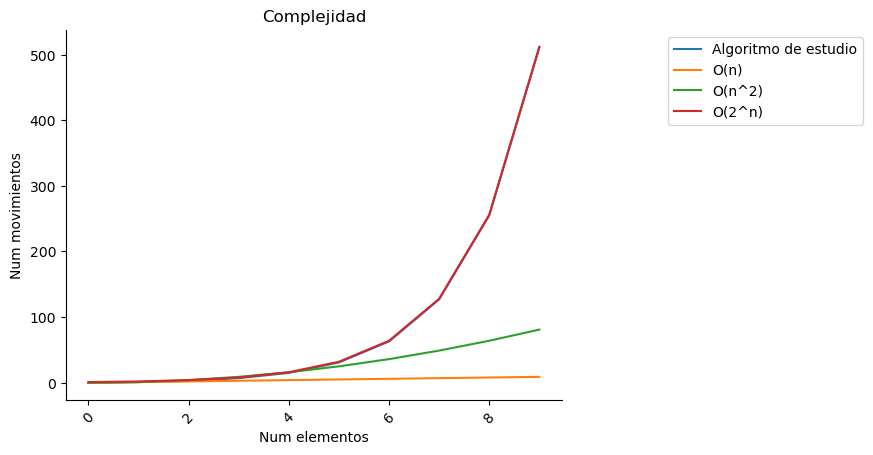

In [162]:
fig, ax = plt.subplots(1, 1)
ax.plot(num_movements, label="Algoritmo de estudio")
ax.plot(num_movements_n, label="O(n)")
ax.plot(num_movements_n2, label="O(n^2)")
ax.plot(num_movements_2n, label="O(2^n)")
clean_plot(ax, "Num elementos", "Num movimientos", "Complejidad")
plt.show();

Si no representamos O(n!) podemos ver como la complejidad del algoritmo implementado para las torres de Hanoi se mapea perfectamente con O(2^n)

## Cambio monedas
Para este ejercicio usando el algoritmo voraz / greedy me he basado totalmente en la solución propuesta en clase seprando un poco la parte de implementación propiamente dicha y la de representación.

In [163]:
def cambio_monedas(cantidad, sistema):
    solucion = []
    for i in sistema:
        solucion.append(cantidad // i)
        cantidad = cantidad % i
    return solucion

In [164]:
sistema = [25, 10, 5, 1]
cantidad = 54
solucion = cambio_monedas(cantidad, sistema)

print(f"Para devolver {cantidad} con un sistema de monedas {sistema}, necesito dar:")
for moneda, cantidad in zip(sistema, solucion):
    if cantidad == 0:
        continue
    print(f"{cantidad} monedas de {moneda}")

Para devolver 54 con un sistema de monedas [25, 10, 5, 1], necesito dar:
2 monedas de 25
4 monedas de 1


## Puntos cercanos

### Fuerza bruta
Para permitir la generalización a n dimensiones creo una función de cálculo de distancia euclidea que considera que su entrada son tuplas. Para puntos unidimensionales es un tanto extraño definirlos como (valor,), pero creo que merecía la pena desde el punto de vista de homogeneidad

In [165]:
def distancia_euclidea(a, b):
    suma = 0
    for i in range(len(a)):
        suma += (a[i] - b[i])**2
    return suma**0.5

In [166]:
def puntos_cercanos_fb(puntos):
    solucion = None
    for i in puntos:
        for j in puntos:
            if i == j:
                continue
            distancia = distancia_euclidea(i, j)
            if solucion == None:
                solucion = (i, j, distancia)
                continue
            if distancia < solucion[2]:
                solucion = (i, j, distancia)
    return solucion

In [167]:
def creacion_puntos(dimension, numero_puntos, maxval = 100):
    puntos = []
    for i in range(numero_puntos):
        puntos.append(tuple(random.randrange(maxval) for _ in range(dimension)))
    return puntos

In [168]:
puntos = creacion_puntos(2, 50)
print(f"La lista utilizada de puntos es {puntos}")
solucion = puntos_cercanos_fb(puntos)
print(f"Los puntos más cercanos son {solucion[0]} y {solucion[1]} con distancia {solucion[2]}")

La lista utilizada de puntos es [(56, 45), (78, 4), (11, 93), (68, 96), (45, 90), (14, 99), (73, 86), (90, 24), (37, 80), (5, 59), (89, 7), (88, 63), (49, 33), (80, 79), (9, 29), (9, 40), (30, 66), (87, 62), (6, 15), (76, 63), (15, 4), (49, 72), (52, 56), (52, 8), (28, 85), (67, 92), (80, 98), (34, 34), (88, 23), (37, 29), (40, 73), (83, 31), (39, 50), (63, 98), (61, 40), (84, 65), (94, 62), (3, 91), (19, 23), (69, 88), (95, 87), (19, 15), (27, 87), (38, 70), (20, 35), (57, 52), (43, 52), (9, 14), (81, 94), (70, 82)]
Los puntos más cercanos son (88, 63) y (87, 62) con distancia 1.4142135623730951


Para el algoritmo de fuerza bruta, tenemos que calcular (n-1) distancias euclideas y (n-1) comparaciones para cada elemento. Si los elementos son m dimensionales, tendríamos por cada distancia euclidea:
1. m potencias de dos
2. m sumas
3. 1 raiz cuadrada

Por tanto, el algoritmo total, tendría n * (n-1) * (2*m + 2) operaciones. Creo que es lógico suponer que la dimensionalidad de los puntos en un problema "normal" es irrelevante con respecto al número de puntos y por tanto se puede considerar como una constante desde el punto de vista del cálculo de la complejidad. Según eso, el algoritmo de fuerza bruta tendría una complejidad de O(n^2).

Para una implementación sencilla, he realizado dos veces más operaciones de las necesarias ya que la distancia entre el punto Pi y el Pj es la misma que la que hay entre Pj y Pi... pero desde el punto de vista del estudio no es significativo y evita tener que guardar las distancias calculadas previamente.

### Divide y vencerás
Como parte del algoritmo hay que ordenar los puntos por su primera componente. Podría implementar también el algoritmo de ordenación, pero voy a usar directamente el sort de Python.

El sort de Python usa el algortimo Timsort con complejidad:
Worst case performance  O(nlogn)
Best case performance   O(n)
Average case performance    O(nlogn)
Worst case space complexity O(n)

In [169]:
def chequear_strip_area(strip_area, solucion_parcial):
    solucion_parcial2 = solucion_parcial
    for i in range(len(strip_area)):
        for j in range(i+1, len(strip_area)):
            distancia = distancia_euclidea(strip_area[j], strip_area[i])
            if distancia < solucion_parcial2[2]:
                solucion_parcial2 = (strip_area[j], strip_area[i], distancia)
    return solucion_parcial2

def puntos_cercanos_dv_recursivo(puntos_x, puntos_y):
    if puntos_x == None:
        return (0, 0, 1000000)
    num_puntos=len(puntos_x)
    if num_puntos < 2:
        return (0, 0, 1000000)
    elif num_puntos == 2:
        return (puntos_x[0], puntos_x[1], distancia_euclidea(puntos_x[0], puntos_x[1]))
    mitad_puntos = num_puntos // 2
    puntos_y_l = []
    puntos_y_r = []
    for i in range(len(puntos_y)):
        if puntos_y[i][0] < puntos_x[mitad_puntos][0]:
            puntos_y_l.append(puntos_y[i])
        else:
            puntos_y_r.append(puntos_y[i])
    solucion_izquierda = puntos_cercanos_dv_recursivo(puntos_x[0: mitad_puntos], puntos_y_l)
    solucion_derecha = puntos_cercanos_dv_recursivo(puntos_x[mitad_puntos:], puntos_y_r)
    if solucion_izquierda[2] < solucion_derecha[2]:
        solucion_parcial = solucion_izquierda
    else:
        solucion_parcial = solucion_derecha
        
    strip_area = []
    for i in range(len(puntos_y)):
        if abs(puntos_y[i][0] < puntos_x[mitad_puntos][0]) < solucion_parcial[2]:
            strip_area.append(puntos_y[i])
            
    return chequear_strip_area(strip_area, solucion_parcial)    

def puntos_cercanos_dv(puntos):
    puntos_x = puntos
    puntos_x.sort(key=lambda x: x[0])
    puntos_y = puntos
    puntos_y.sort(key=lambda x: x[1])
    return puntos_cercanos_dv_recursivo(puntos_x, puntos_y)

In [175]:
puntos = creacion_puntos(5, 50)
print(f"La lista utilizada de puntos es {puntos}")
solucion = puntos_cercanos_fb(puntos)
print(f"Los puntos más cercanos por fuerza bruta son {solucion[0]} y {solucion[1]} con distancia {solucion[2]}")
solucion = puntos_cercanos_dv(puntos)
print(f"Los puntos más cercanos por divide y vencerás son {solucion[0]} y {solucion[1]} con distancia {solucion[2]}")

La lista utilizada de puntos es [(90, 76, 69, 52, 26), (0, 56, 19, 43, 71), (2, 65, 51, 73, 29), (14, 8, 6, 75, 46), (84, 88, 8, 72, 7), (61, 0, 25, 52, 0), (23, 17, 11, 5, 69), (53, 75, 18, 42, 97), (67, 80, 6, 12, 30), (88, 19, 13, 66, 48), (85, 96, 50, 70, 75), (6, 77, 64, 71, 11), (43, 79, 25, 75, 50), (96, 84, 46, 71, 92), (90, 28, 26, 41, 75), (47, 97, 66, 40, 55), (36, 0, 21, 65, 28), (50, 45, 56, 45, 23), (45, 74, 59, 66, 14), (29, 99, 76, 20, 85), (96, 48, 48, 60, 54), (23, 44, 50, 12, 52), (38, 30, 2, 75, 11), (10, 3, 36, 80, 75), (25, 36, 44, 49, 48), (27, 30, 85, 19, 23), (33, 17, 60, 56, 56), (86, 72, 69, 10, 64), (62, 43, 37, 97, 31), (14, 18, 35, 12, 31), (55, 6, 54, 43, 87), (25, 1, 54, 81, 69), (59, 53, 80, 1, 37), (70, 4, 97, 96, 41), (13, 5, 94, 13, 30), (14, 56, 9, 42, 16), (32, 71, 25, 46, 79), (99, 84, 69, 32, 92), (51, 63, 12, 36, 8), (6, 88, 30, 54, 33), (63, 75, 91, 18, 17), (81, 48, 82, 45, 3), (38, 1, 41, 87, 23), (79, 81, 80, 97, 18), (88, 50, 12, 75, 72), (

En este caso, la complejidad del algoritmo recursivo es O(nlog(n)). Como se requiere una ordenacion previa, que también es de complejidad O(nlog(n)) la complejidad total es O(nlog(n)).

Se puede observar adicionalmente como el algoritmo es válido para n dimensiones.

In [171]:
num_points = 250
time_results = np.zeros((num_points - 2,2))
operations = [puntos_cercanos_fb, puntos_cercanos_dv]
for i in range(2, num_points):
    puntos = creacion_puntos(2, i)
    for pos, op in enumerate(operations):
        begin = time.time_ns()
        solucion = op(puntos)
        time_results[i-2, pos] = (time.time_ns() - begin) / 1000000
        
df = pd.DataFrame(time_results, columns=["Fuerza bruta", "Divide y vencerás"])
df

,Fuerza bruta,Divide y vencerás
0,0.0000,0.0000
1,0.0000,0.0000
2,0.0000,0.0000
3,0.0000,0.0000
4,0.0000,0.0000
...,...,...
243,100.3339,16.5254
244,133.5055,16.4683
245,100.7378,16.1815
246,111.8104,21.1674


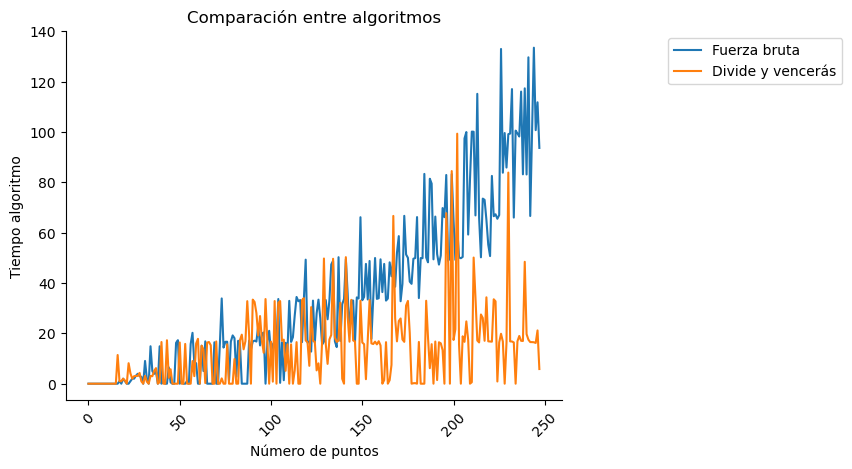

In [172]:
ax = df[["Fuerza bruta", "Divide y vencerás"]].plot()
clean_plot(ax, "Número de puntos", "Tiempo algoritmo", "Comparación entre algoritmos")

Se puede observar gráficamente cómo la complejidad del divide y vencerás es O(nlog(n)) frente a la O(n^2) del de fuerza fruta.